In [1]:
from Player import *
from State import *
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm

### Quantum Test

In [2]:
p1 = DeepQPlayer('p1')
p2 = DeepQPlayer('p2')

st = QState(p1, p2)

st.play(1)

TypeError: chooseCollapse() missing 1 required positional argument: 'trace'

### Classic 

In [2]:
p1 = RandomClassicPlayer('p1')
p2 = RandomClassicPlayer('p2')

st = ClassicState(p1, p2)

st.play(1000)

P1 method: 'sarsa', P2 method 'sarsa'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


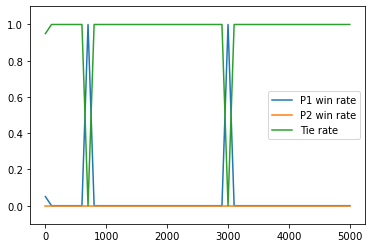

P1 method: 'sarsa', P2 method 'Random Player'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


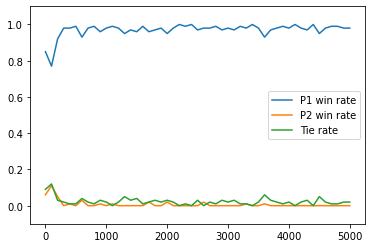

P1 method: 'expected_sarsa', P2 method 'sarsa'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


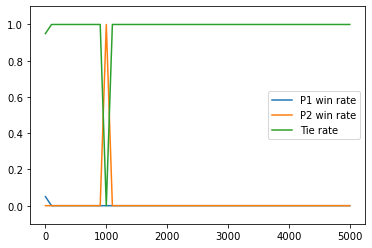

P1 method: 'expected_sarsa', P2 method 'Random Player'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


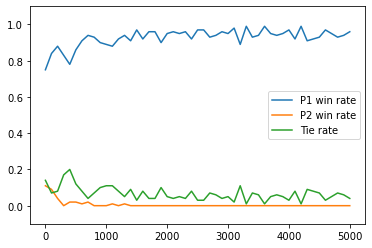

P1 method: 'Random Player', P2 method 'sarsa'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


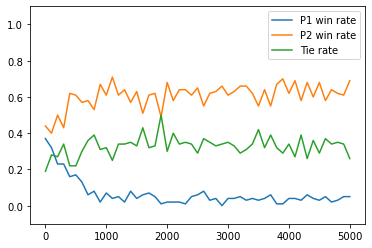

P1 method: 'Random Player', P2 method 'Random Player'
Epochs: 50, Total Training Games: 25000, Games per Epoch: 500
Eval Games per iteration: 100


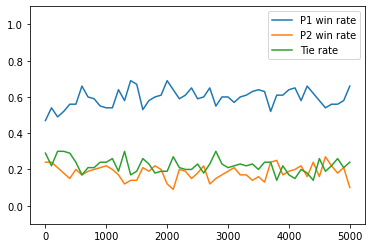

In [7]:
iterations = 50
train_games_per_iteration = 500
eval_games_per_iteration = 100
verbose = False
visualize = True
start_from_0 = True

P1 = [ClassicPlayer("p1", update_method='sarsa'), ClassicPlayer("p1", update_method='expected_sarsa'), RandomClassicPlayer("p1")] # Player("p1", update_method='expected_sarsa')
P2 = [ClassicPlayer("p2", update_method='sarsa'), RandomClassicPlayer("p2")] # Player("p1", update_method='expected_sarsa')

for p1 in P1:
    for p2 in P2:
        st = ClassicState(p1, p2, lose_reward=-1)
        p1_win_rate = []
        p2_win_rate = []
        tie_rate = []
        p1.states_value = {}
        p2.states_value = {}
        if start_from_0:
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            
        for i in range(iterations):
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            p1.is_eval = True
            p2.is_eval = True
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            if verbose:
                print("________________________________")
                print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
                print("Training Iteration: {}, Train Games: {}, Eval Games: {}".format(i+1, (i+1)*train_games_per_iteration, eval_games_per_iteration))
                print("\tP1 win\tP2 win\tTie")
                print('Win\t{}\t{}\t{}'.format(p1_win_rate[-1], p2_win_rate[-1], tie_rate[-1]))
                
            # Train (After Eval now)
            p1.exp_rate = 0.3
            p2.exp_rate = 0.3
            p1.is_eval = False
            p2.is_eval = False
            st.reset_metrics()
            st.play(train_games_per_iteration)
            
        if visualize:
            if start_from_0:
                games = np.arange(0, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            else:
                games = np.arange(eval_games_per_iteration, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
            print("Epochs: {}, Total Training Games: {}, Games per Epoch: {}".format(iterations, iterations*train_games_per_iteration, train_games_per_iteration))
            print("Eval Games per iteration: {}".format(eval_games_per_iteration))
#             axes, fig = 
            p1_plot = plt.plot(games, p1_win_rate, label="P1 win rate")
            p2_plot = plt.plot(games, p2_win_rate, label="P2 win rate")
            tie_plot = plt.plot(games, tie_rate, label="Tie rate")
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()

### Superposition

In [4]:
from Player import *
from State import *
from collections import Counter
import matplotlib.pyplot as plt

p1 = SPPlayer('p1')
p2 = SPPlayer('p2')

st = SPState(p1, p2)

st.play(100)

100%|██████████| 150/150 [21:49<00:00,  8.73s/it]   

P1 method: 'sarsa', P2 method 'sarsa'
Epochs: 150, Total Training Games: 30000, Games per Epoch: 200
Eval Games per iteration: 100


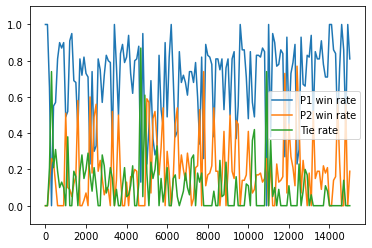

100%|██████████| 150/150 [09:28<00:00,  3.79s/it]

P1 method: 'sarsa', P2 method 'Random Player'
Epochs: 150, Total Training Games: 30000, Games per Epoch: 200
Eval Games per iteration: 100


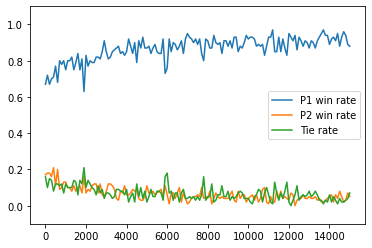

100%|██████████| 150/150 [06:09<00:00,  2.47s/it]

P1 method: 'Random Player', P2 method 'sarsa'
Epochs: 150, Total Training Games: 30000, Games per Epoch: 200
Eval Games per iteration: 100


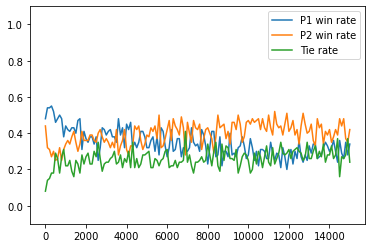

100%|██████████| 150/150 [01:08<00:00,  2.20it/s]

P1 method: 'Random Player', P2 method 'Random Player'
Epochs: 150, Total Training Games: 30000, Games per Epoch: 200
Eval Games per iteration: 100


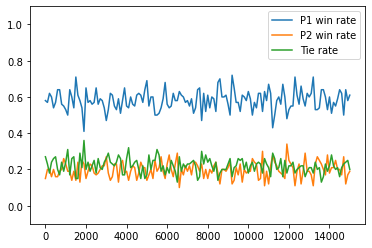

CPU times: user 30min 40s, sys: 1min 35s, total: 32min 15s
Wall time: 38min 42s


In [13]:
%%time
iterations = 150
train_games_per_iteration = 200
eval_games_per_iteration = 100
verbose = False
visualize = True
start_from_0 = True

P1 = [SPPlayer("p1", update_method='sarsa'), RandomSPPlayer("p1")] # Player("p1", update_method='expected_sarsa')
P2 = [SPPlayer("p2", update_method='sarsa'), RandomSPPlayer("p2")] # Player("p1", update_method='expected_sarsa')

for p1 in P1:
    for p2 in P2:
        st = SPState(p1, p2)
        p1_win_rate = []
        p2_win_rate = []
        tie_rate = []
        p1.states_value = {}
        p2.states_value = {}
        p1.forget()
        p2.forget()
        if start_from_0:
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            
        for i in tqdm(range(iterations)):
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            p1.is_eval = True
            p2.is_eval = True
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            if verbose:
                print("________________________________")
                print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
                print("Training Iteration: {}, Train Games: {}, Eval Games: {}".format(i+1, (i+1)*train_games_per_iteration, eval_games_per_iteration))
                print("\tP1 win\tP2 win\tTie")
                print('Win\t{}\t{}\t{}'.format(p1_win_rate[-1], p2_win_rate[-1], tie_rate[-1]))
                
            # Train (After Eval now)
            p1.exp_rate = 0.3
            p2.exp_rate = 0.3
            p1.is_eval = False
            p2.is_eval = False
            st.reset_metrics()
            st.play(train_games_per_iteration)
            
        if visualize:
            if start_from_0:
                games = np.arange(0, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            else:
                games = np.arange(eval_games_per_iteration, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
            print("Epochs: {}, Total Training Games: {}, Games per Epoch: {}".format(iterations, iterations*train_games_per_iteration, train_games_per_iteration))
            print("Eval Games per iteration: {}".format(eval_games_per_iteration))
#             axes, fig = 
            p1_plot = plt.plot(games, p1_win_rate, label="P1 win rate")
            p2_plot = plt.plot(games, p2_win_rate, label="P2 win rate")
            tie_plot = plt.plot(games, tie_rate, label="Tie rate")
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()

### Quantum

In [1]:
from Player import *
from State import *
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
p1 = DeepQPlayer('p1')
p2 = DeepQPlayer('p2')

st = QState(p1, p2)

st.play(5)

[[(1, 1), (2, -1)], [], [], [], [], [], [], [(1, 1), (2, -1)], []]
value [1, [], [], [], [], [], [], -1, []]
[[(1, 1), (2, -1)], [], [], [], [], [], [], [(1, 1), (2, -1)], []]
value [-1, [], [], [], [], [], [], 1, []]
[-1, [(6, -1)], [(4, -1), (5, 1), (6, -1)], [(3, 1), (7, 1)], [(4, -1), (7, 1)], [(3, 1), (5, 1)], [], 1, []]


TypeError: argument of type 'int' is not iterable

In [6]:
st.play()
len(p1.states_value)

1188

100%|██████████| 50/50 [02:59<00:00,  3.59s/it]

P1 method: 'sarsa', P2 method 'sarsa'
Epochs: 50, Total Training Games: 10000, Games per Epoch: 200
Eval Games per iteration: 100


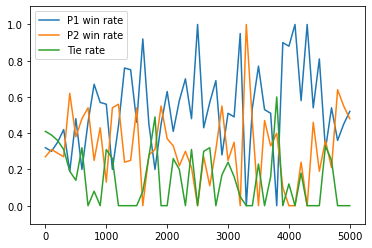

100%|██████████| 50/50 [01:49<00:00,  2.18s/it]

P1 method: 'sarsa', P2 method 'sarsa'
Epochs: 50, Total Training Games: 10000, Games per Epoch: 200
Eval Games per iteration: 100


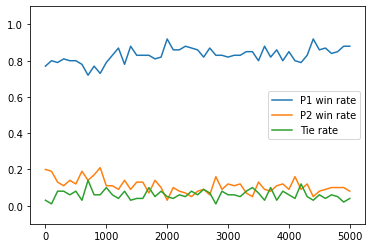

100%|██████████| 50/50 [01:52<00:00,  2.26s/it]

P1 method: 'sarsa', P2 method 'sarsa'
Epochs: 50, Total Training Games: 10000, Games per Epoch: 200
Eval Games per iteration: 100


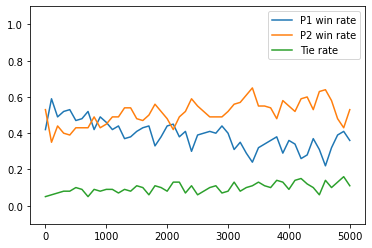

100%|██████████| 50/50 [00:03<00:00, 16.55it/s]


P1 method: 'sarsa', P2 method 'sarsa'
Epochs: 50, Total Training Games: 10000, Games per Epoch: 200
Eval Games per iteration: 100


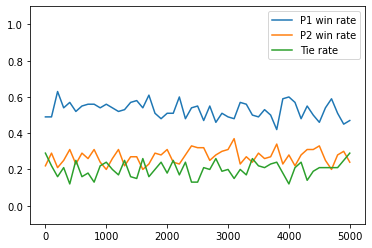

CPU times: user 6min 45s, sys: 1.21 s, total: 6min 46s
Wall time: 6min 47s


In [10]:
%%time
iterations = 50
train_games_per_iteration = 200
eval_games_per_iteration = 100
verbose = False
visualize = True
start_from_0 = True

P1 = [QPlayer("p1", update_method='sarsa'), RandomQPlayer("p1")] # Player("p1", update_method='expected_sarsa')
P2 = [QPlayer("p2", update_method='sarsa'), RandomQPlayer("p2")] # Player("p1", update_method='expected_sarsa')

for p1 in P1:
    for p2 in P2:
        st = QState(p1, p2)
        p1_win_rate = []
        p2_win_rate = []
        tie_rate = []
        p1.states_value = {}
        p2.states_value = {}
        p1.forget()
        p2.forget()
        if start_from_0:
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            
        for i in tqdm(range(iterations)):
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            p1.is_eval = True
            p2.is_eval = True
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            if verbose:
                print("________________________________")
                print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
                print("Training Iteration: {}, Train Games: {}, Eval Games: {}".format(i+1, (i+1)*train_games_per_iteration, eval_games_per_iteration))
                print("\tP1 win\tP2 win\tTie")
                print('Win\t{}\t{}\t{}'.format(p1_win_rate[-1], p2_win_rate[-1], tie_rate[-1]))
                
            # Train (After Eval now)
            p1.exp_rate = 0.3
            p2.exp_rate = 0.3
            p1.is_eval = False
            p2.is_eval = False
            st.reset_metrics()
            st.play(train_games_per_iteration)
            
        if visualize:
            if start_from_0:
                games = np.arange(0, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            else:
                games = np.arange(eval_games_per_iteration, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
            print("Epochs: {}, Total Training Games: {}, Games per Epoch: {}".format(iterations, iterations*train_games_per_iteration, train_games_per_iteration))
            print("Eval Games per iteration: {}".format(eval_games_per_iteration))
#             axes, fig = 
            p1_plot = plt.plot(games, p1_win_rate, label="P1 win rate")
            p2_plot = plt.plot(games, p2_win_rate, label="P2 win rate")
            tie_plot = plt.plot(games, tie_rate, label="Tie rate")
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()

100%|██████████| 30/30 [00:01<00:00, 19.44it/s]


P1 method: 'Random Player', P2 method 'Random Player'
Epochs: 30, Total Training Games: 6000, Games per Epoch: 200
Eval Games per iteration: 100


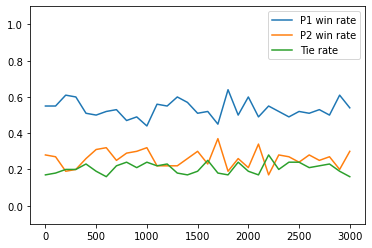

100%|██████████| 30/30 [04:20<00:00,  8.67s/it]

P1 method: 'sarsa', P2 method 'Random Player'
Epochs: 30, Total Training Games: 6000, Games per Epoch: 200
Eval Games per iteration: 100


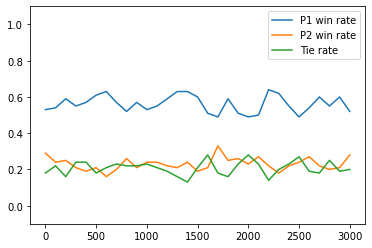

100%|██████████| 30/30 [01:03<00:00,  2.12s/it]

P1 method: 'sarsa', P2 method 'Random Player'
Epochs: 30, Total Training Games: 6000, Games per Epoch: 200
Eval Games per iteration: 100


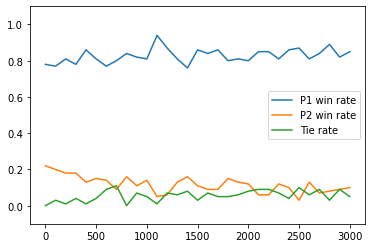

100%|██████████| 30/30 [04:31<00:00,  9.05s/it]

P1 method: 'sarsa', P2 method 'Random Player'
Epochs: 30, Total Training Games: 6000, Games per Epoch: 200
Eval Games per iteration: 100


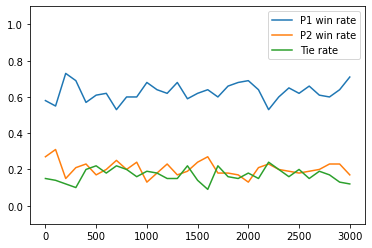

CPU times: user 10min 3s, sys: 1.26 s, total: 10min 4s
Wall time: 10min 5s


In [5]:
%%time
from Player import *
from State import *
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
from model import *

iterations = 30
train_games_per_iteration = 200
eval_games_per_iteration = 100
verbose = False
visualize = True
start_from_0 = True

P1 = [RandomQPlayer('p1'), DeepQPlayer("p1", model_cls=Model2), QPlayer("p1"), DeepQPlayer("p1", model_cls=LinearModel)] # Player("p1", update_method='expected_sarsa')
P2 = [RandomQPlayer("p2")] # Player("p1", update_method='expected_sarsa')

for p1 in P1:
    for p2 in P2:
        st = QState(p1, p2)
        p1_win_rate = []
        p2_win_rate = []
        tie_rate = []
        p1.states_value = {}
        p2.states_value = {}
        p1.forget()
        p2.forget()
        if start_from_0:
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            
        for i in tqdm(range(iterations)):
            # Eval
            p1.exp_rate = 0
            p2.exp_rate = 0
            p1.is_eval = True
            p2.is_eval = True
            st.reset_metrics()
            st.play(eval_games_per_iteration)
            p1_win_rate.append(st.p1_wins/st.games)
            p2_win_rate.append(st.p2_wins/st.games)
            tie_rate.append(st.tie/st.games)
            if verbose:
                print("________________________________")
                print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
                print("Training Iteration: {}, Train Games: {}, Eval Games: {}".format(i+1, (i+1)*train_games_per_iteration, eval_games_per_iteration))
                print("\tP1 win\tP2 win\tTie")
                print('Win\t{}\t{}\t{}'.format(p1_win_rate[-1], p2_win_rate[-1], tie_rate[-1]))
                
            # Train (After Eval now)
            p1.exp_rate = 0.3
            p2.exp_rate = 0.3
            p1.is_eval = False
            p2.is_eval = False
            st.reset_metrics()
            st.play(train_games_per_iteration)
            
        if visualize:
            if start_from_0:
                games = np.arange(0, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            else:
                games = np.arange(eval_games_per_iteration, (iterations+1)*eval_games_per_iteration, eval_games_per_iteration)
            print("P1 method: '{}', P2 method '{}'".format(p1.update_method, p2.update_method))
            print("Epochs: {}, Total Training Games: {}, Games per Epoch: {}".format(iterations, iterations*train_games_per_iteration, train_games_per_iteration))
            print("Eval Games per iteration: {}".format(eval_games_per_iteration))
#             axes, fig = 
            p1_plot = plt.plot(games, p1_win_rate, label="P1 win rate")
            p2_plot = plt.plot(games, p2_win_rate, label="P2 win rate")
            tie_plot = plt.plot(games, tie_rate, label="Tie rate")
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()